This is the rough flow required for converting receipt data from a PDF to a spreadsheet that can be analyzed. 

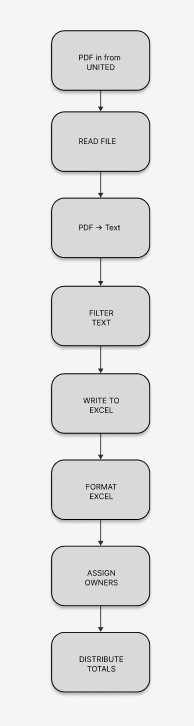

Each of these stages is critical to the final outcome. Filtering the Text and Writing to Excel have proven to be the meat of the matter.

This is my Toy Receipt:
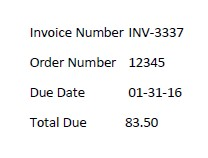

My script can read this fine using the PDF Read function and outputting to strPDF as text. So how do I write this unfiltered data to Excel?

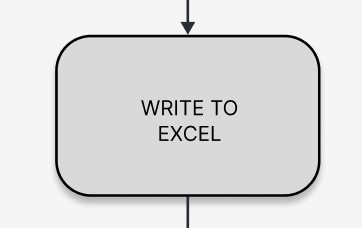

Excel Scope allows us to specify the Excel Sheet to be affected and it allows us to keep that sheet persitantly open while sending data to it.

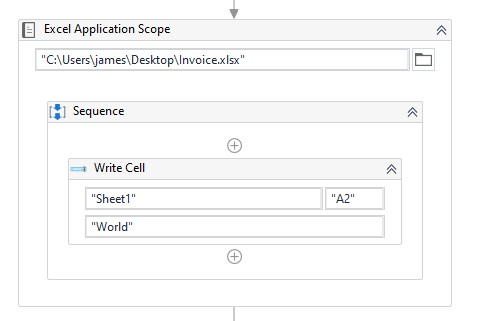

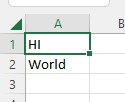

At some point, I must have set the state to something that produced nearly the output I'm seeking.

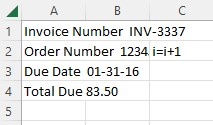

So generate table node allows us to cast the PDF text to a data table which can be written to Excel.
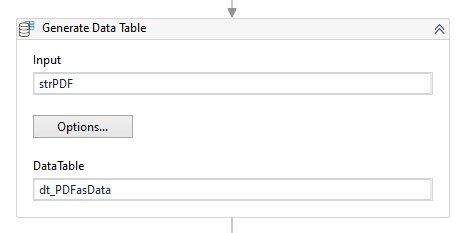

So now we can read a PDF, and turn that into a Table, and write the Table to Excel. Good times.

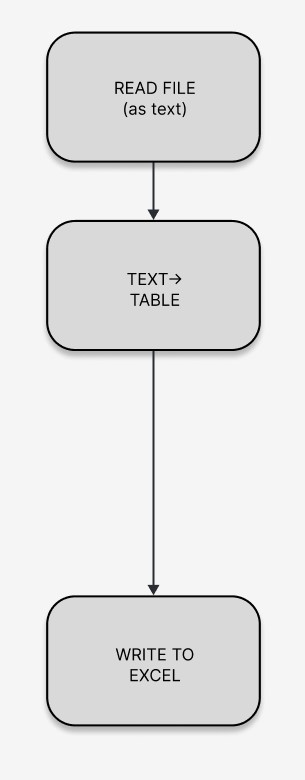

So obviously the missing piece is, manipulating / filtering the text.